In [1]:
from histogram_manager import HistogramManager
import ROOT
import atlasplots
atlasplots.set_atlas_style()

Welcome to JupyROOT 6.14/04
Applying ATLAS style settings


In [2]:
hm = HistogramManager("/project/def-psavard/ladamek/momentumvalidationoutput/Mar9_v03_v2_nocalib/Output.root")
hm.list_histograms("Mass")
hm.list_histograms("PT")
hm.list_histograms("Weight")

Initializing histogram manager on file /project/def-psavard/ladamek/momentumvalidationoutput/Mar9_v03_v2_nocalib/Output.root
Found these channels in the file ['Data', 'MC', 'MCCalib', 'MC_JPSI', 'Data1516', 'Data17', 'Data18', 'MC1516', 'MC17', 'MC18', 'MC1516Calib', 'MC17Calib', 'MC18Calib', 'MC1516_JPSI', 'MC17_JPSI', 'MC18_JPSI']
listing all histograms:
MassSpectrum_CB_Inclusive
MassSpectrum_CB_neglead
MassSpectrum_CB_poslead
MassSpectrum_ID_backward
MassSpectrum_ID_forward
MassSpectrum_ID_Inclusive
MassSpectrum_ID_neglead
MassSpectrum_ID_poslead
MassSpectrum_ME_backward
MassSpectrum_ME_forward
MassSpectrum_ME_Inclusive
MassSpectrum_ME_neglead
MassSpectrum_ME_poslead
MassSpectrumJPSI_ID_Inclusive
MassSpectrumJPSI_ID_neglead
MassSpectrumJPSI_ID_poslead
MassSpectrumJPSI_ME_Inclusive
MassSpectrumJPSI_ME_neglead
MassSpectrumJPSI_ME_poslead
listing all histograms:
PT_Leading_ID_Inclusive
PT_Leading_ID_neglead
PT_Leading_ID_poslead
PT_Leading_ME_Inclusive
PT_Leading_ME_neglead
PT_Leading_

In [3]:
histograms = hm.get_histograms("WeightVariable_ID")
canvas_sherpa = ROOT.TCanvas()
histograms["MCSherpa"].Draw()
canvas_sherpa.Draw()

KeyError: 'MCSherpa'

In [ ]:
sherpa_weight_profile = ROOT.TH1D("Weight", "Weight", histograms["MCSherpa"].GetNbinsX() + 2, -100.0, 100.0)
sherpa_weight_profile.GetXaxis().SetTitle("Weight")
sherpa_weight_profile.GetYaxis().SetTitle("N Generated Events")
for i in range(0, histograms["MCSherpa"].GetNbinsX() + 1):
    print(histograms["MCSherpa"].GetBinCenter(i), histograms["MCSherpa"].GetBinContent(i)/histograms["MCSherpa"].GetBinCenter(i))
    sherpa_weight_profile.SetBinContent(i, histograms["MCSherpa"].GetBinContent(i)/histograms["MCSherpa"].GetBinCenter(i))
canvas = ROOT.TCanvas("SherpaWeights2", "SherpaWeights2")
sherpa_weight_profile.Draw()
canvas.Draw()

In [ ]:
canvas = ROOT.TCanvas("SherpaWeights2", "SherpaWeights2")
sherpa_weight_profile.SetMinimum(0.0)
sherpa_weight_profile.SetMaximum(500.0)
sherpa_weight_profile.Draw()
canvas.Draw()

In [ ]:
weight_profile = ROOT.TH1D("Weight", "Weight", histograms["MCSherpa"].GetNbinsX() + 2, -100.0, 100.0)
weight_profile.GetXaxis().SetTitle("Weight")
weight_profile.GetYaxis().SetTitle("N Generated Events")
for i in range(0, histograms["MC"].GetNbinsX() + 1):
    print(histograms["MC"].GetBinCenter(i), histograms["MC"].GetBinContent(i)/histograms["MC"].GetBinCenter(i))
    weight_profile.SetBinContent(i, histograms["MC"].GetBinContent(i)/histograms["MC"].GetBinCenter(i))
canvas = ROOT.TCanvas("Weights2", "Weights2")
weight_profile.Draw()
canvas.Draw()

In [ ]:
canvas = ROOT.TCanvas("Weights2", "Weights2")
weight_profile.SetMinimum(0.0)
weight_profile.SetMaximum(500.0)
weight_profile.Draw()
canvas.Draw()

In [ ]:
for i in range(0, histograms["MC"].GetNbinsX() + 1):
    print(histograms["MC"].GetBinCenter(i), histograms["MC"].GetBinContent(i)/histograms["MC"].GetBinCenter(i))

Applying ATLAS style settings


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

Info in <TCanvas::Print>: pdf file plots/MassSpectrum_ID_InclusiveMCCalib MassSpectrum_ID_InclusiveData.pdf has been created
Info in <TCanvas::Print>: pdf file plots/MassSpectrum_CB_InclusiveMCCalib MassSpectrum_CB_InclusiveData.pdf has been created
Info in <TCanvas::Print>: pdf file plots/MassSpectrum_ME_InclusiveMCCalib MassSpectrum_ME_InclusiveData.pdf has been created
Info in <TCanvas::Print>: pdf file plots/MassSpectrum_ID_InclusiveMC MassSpectrum_ID_InclusiveData.pdf has been created
Info in <TCanvas::Print>: pdf file plots/MassSpectrum_CB_InclusiveMC MassSpectrum_CB_InclusiveData.pdf has been created
Info in <TCanvas::Print>: pdf file plots/MassSpectrum_ME_InclusiveMC MassSpectrum_ME_InclusiveData.pdf has been created
Info in <TCanvas::Print>: pdf file plots/Pair_ID_PtMCCalib Pair_ID_PtData.pdf has been created


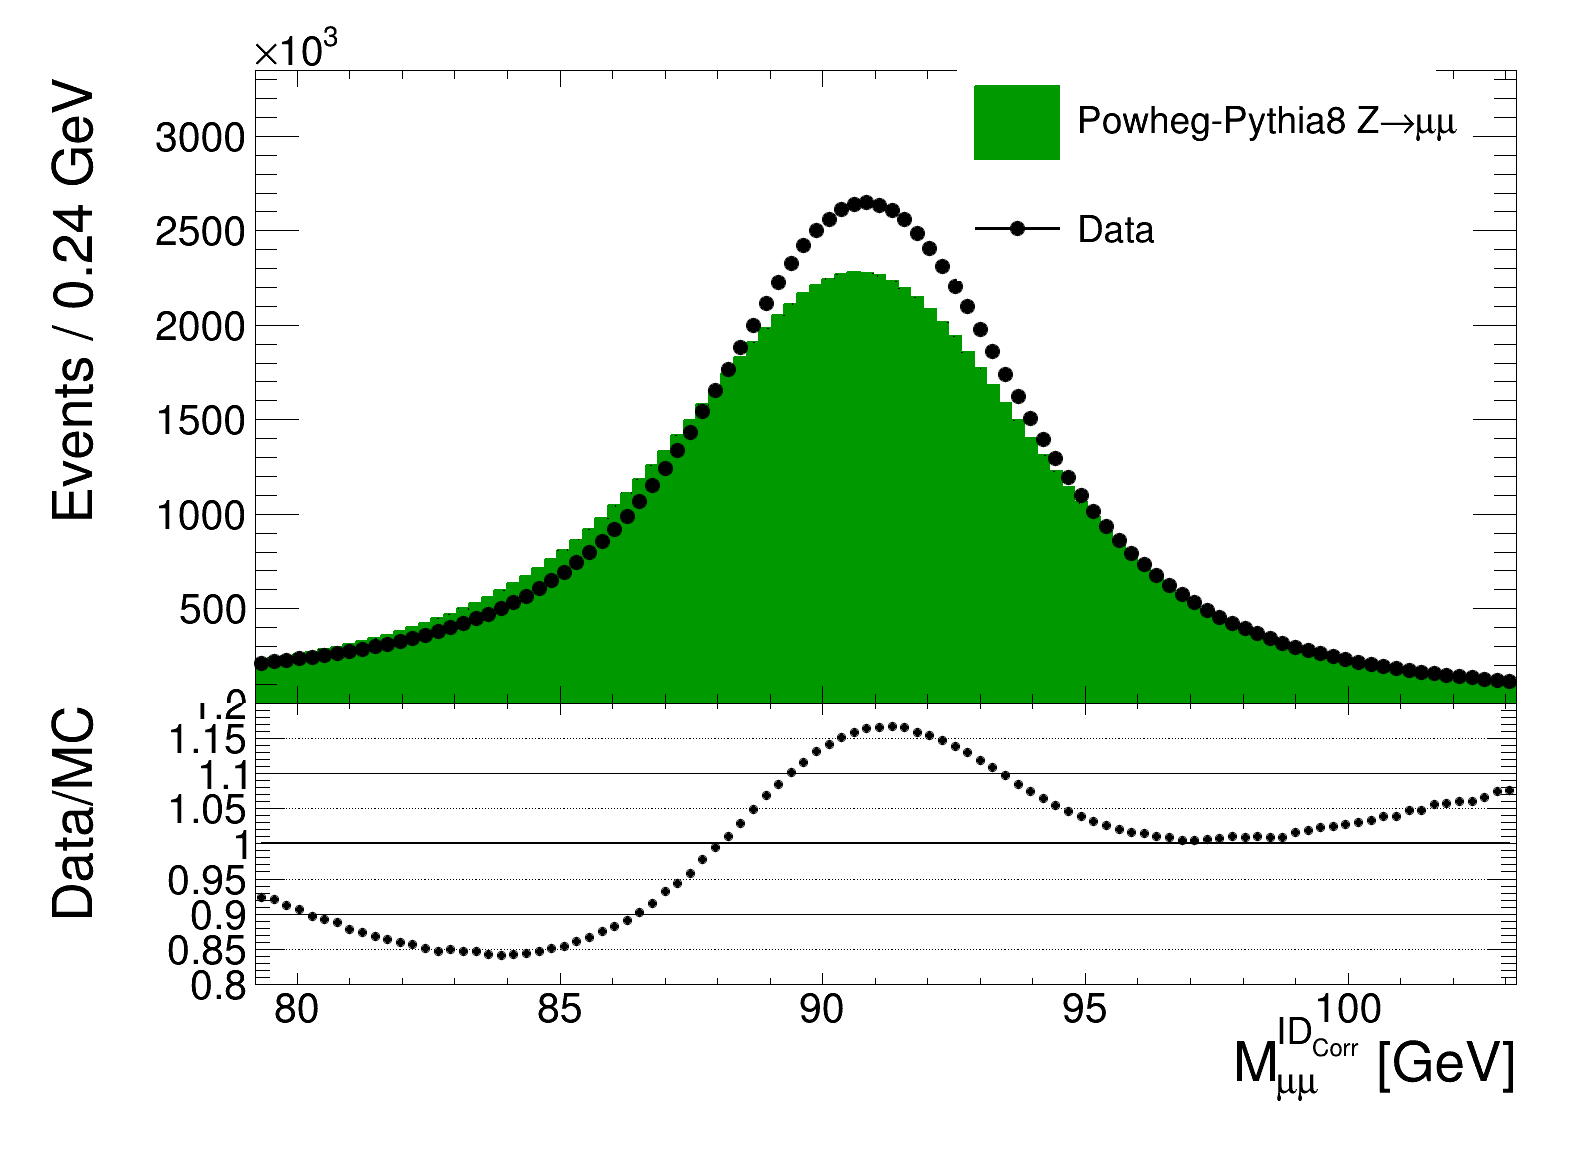

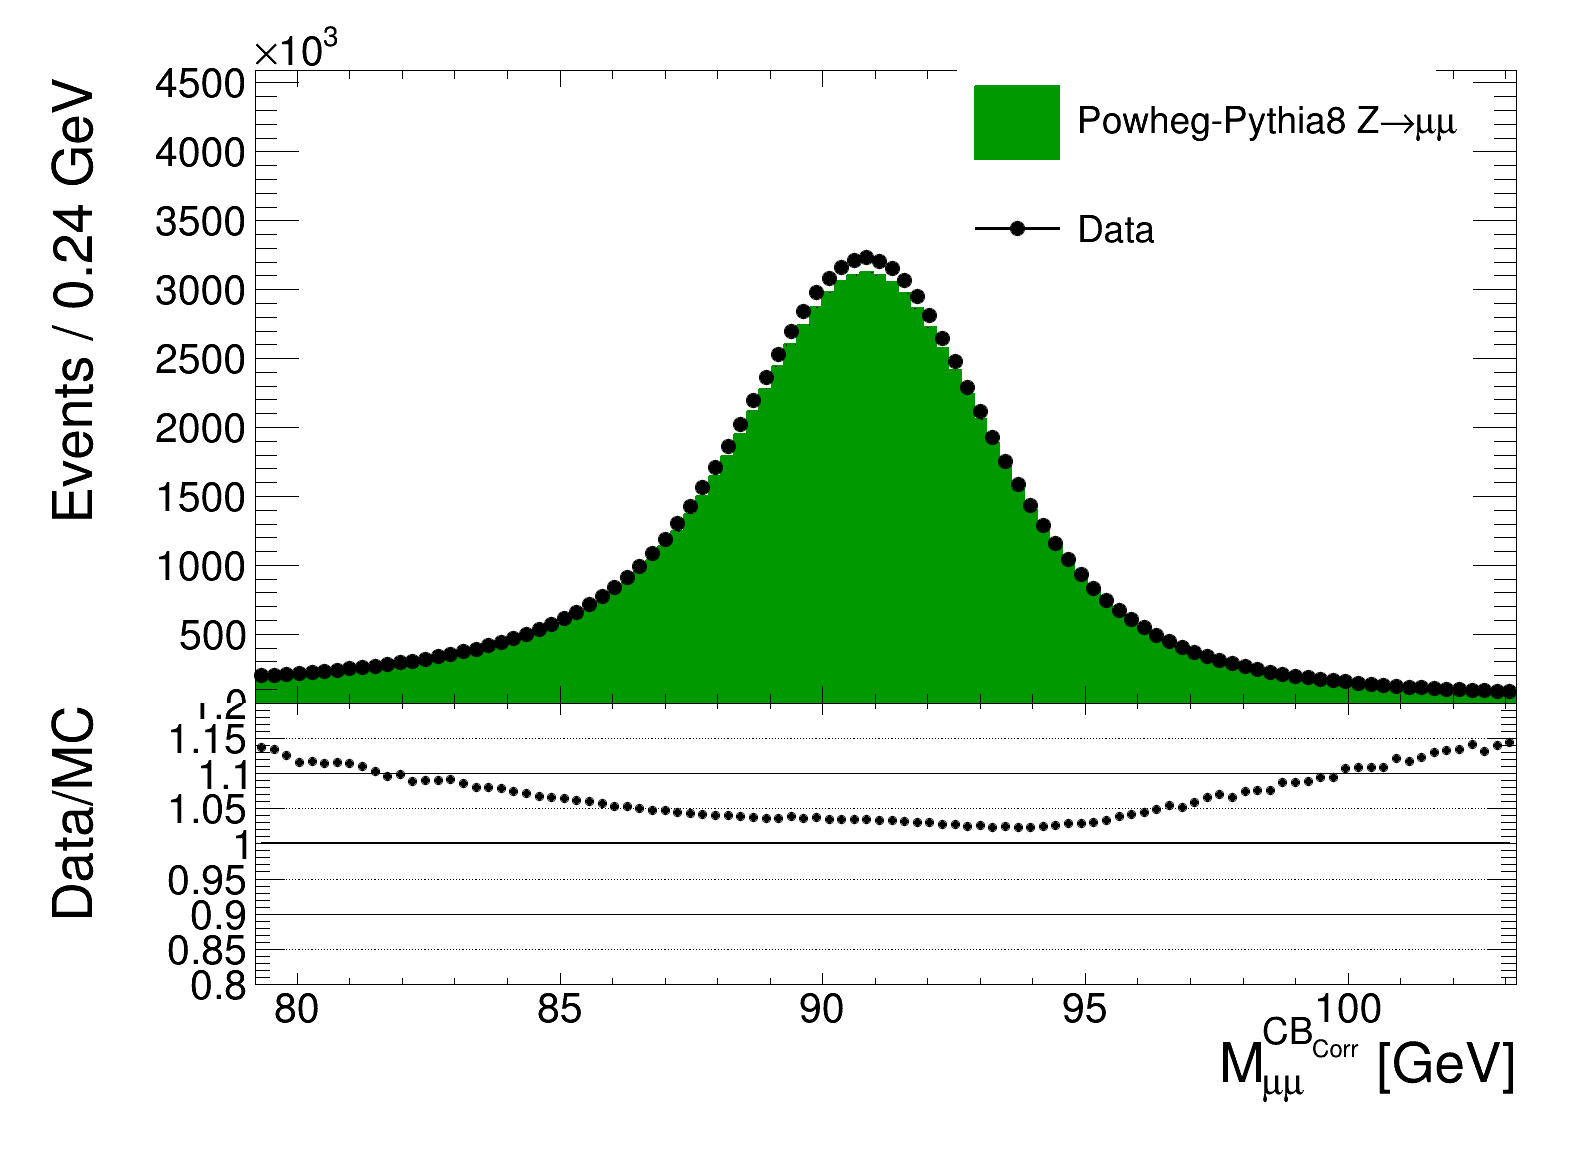

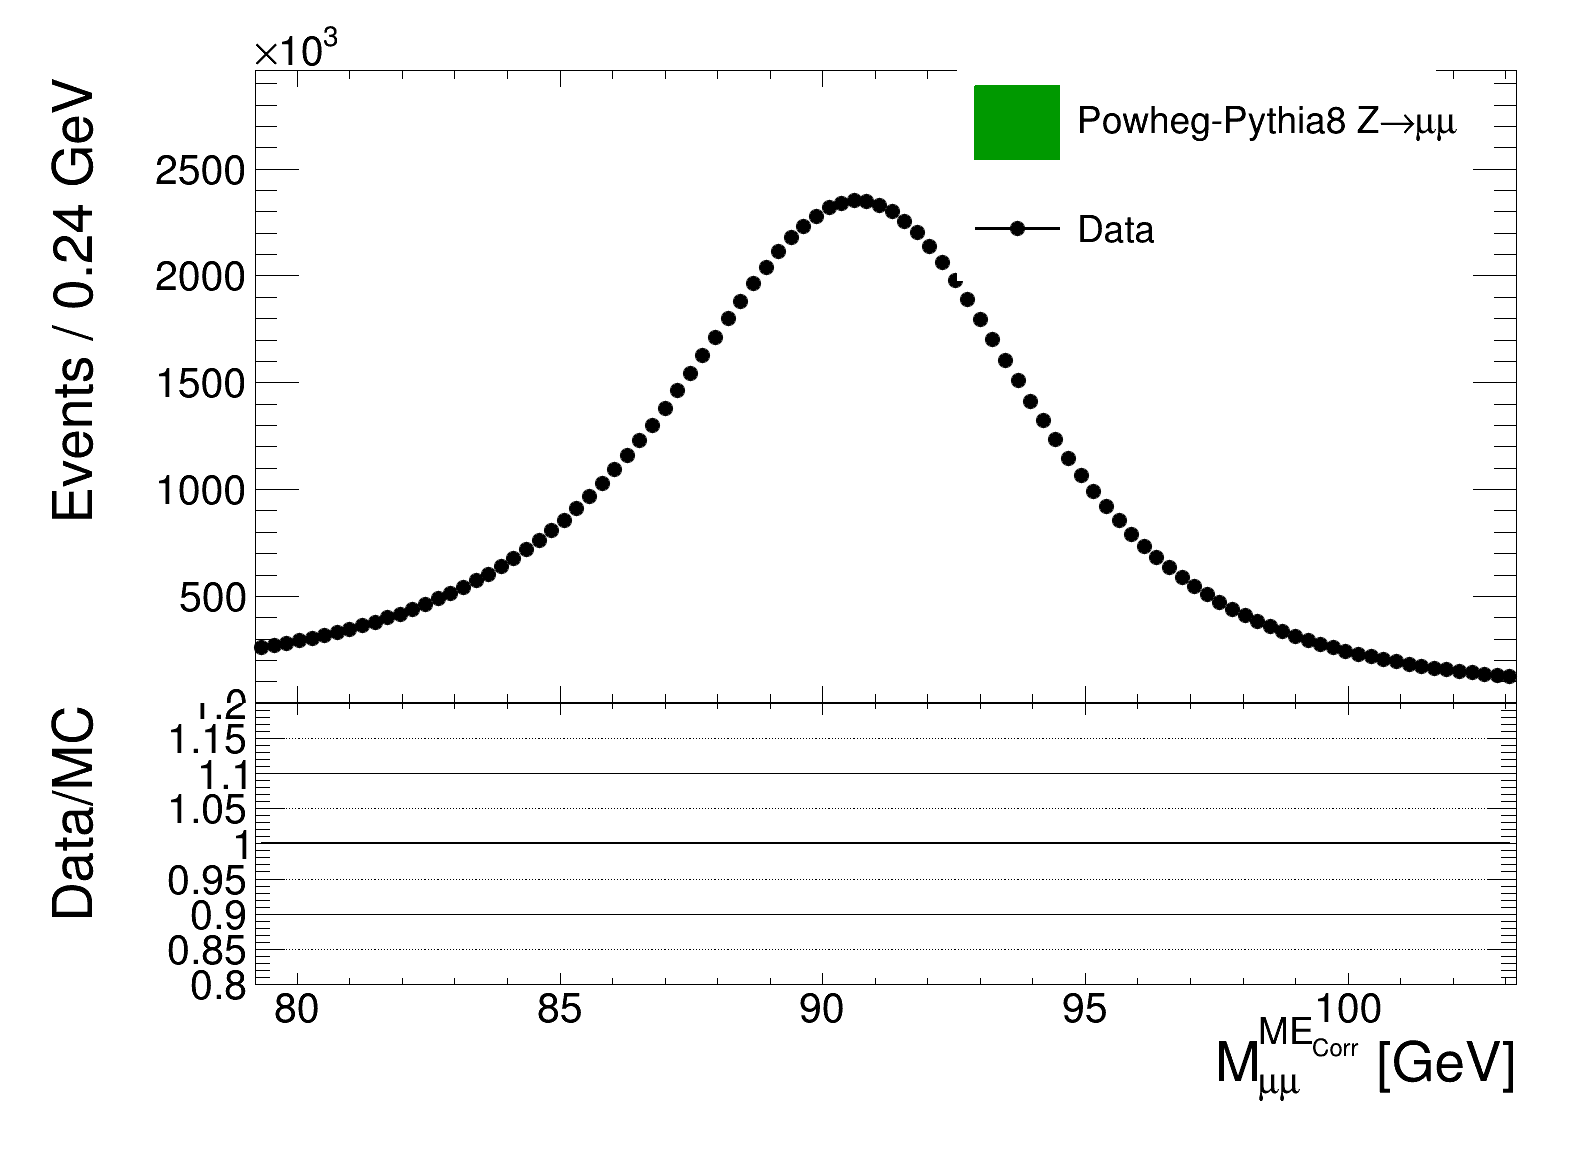

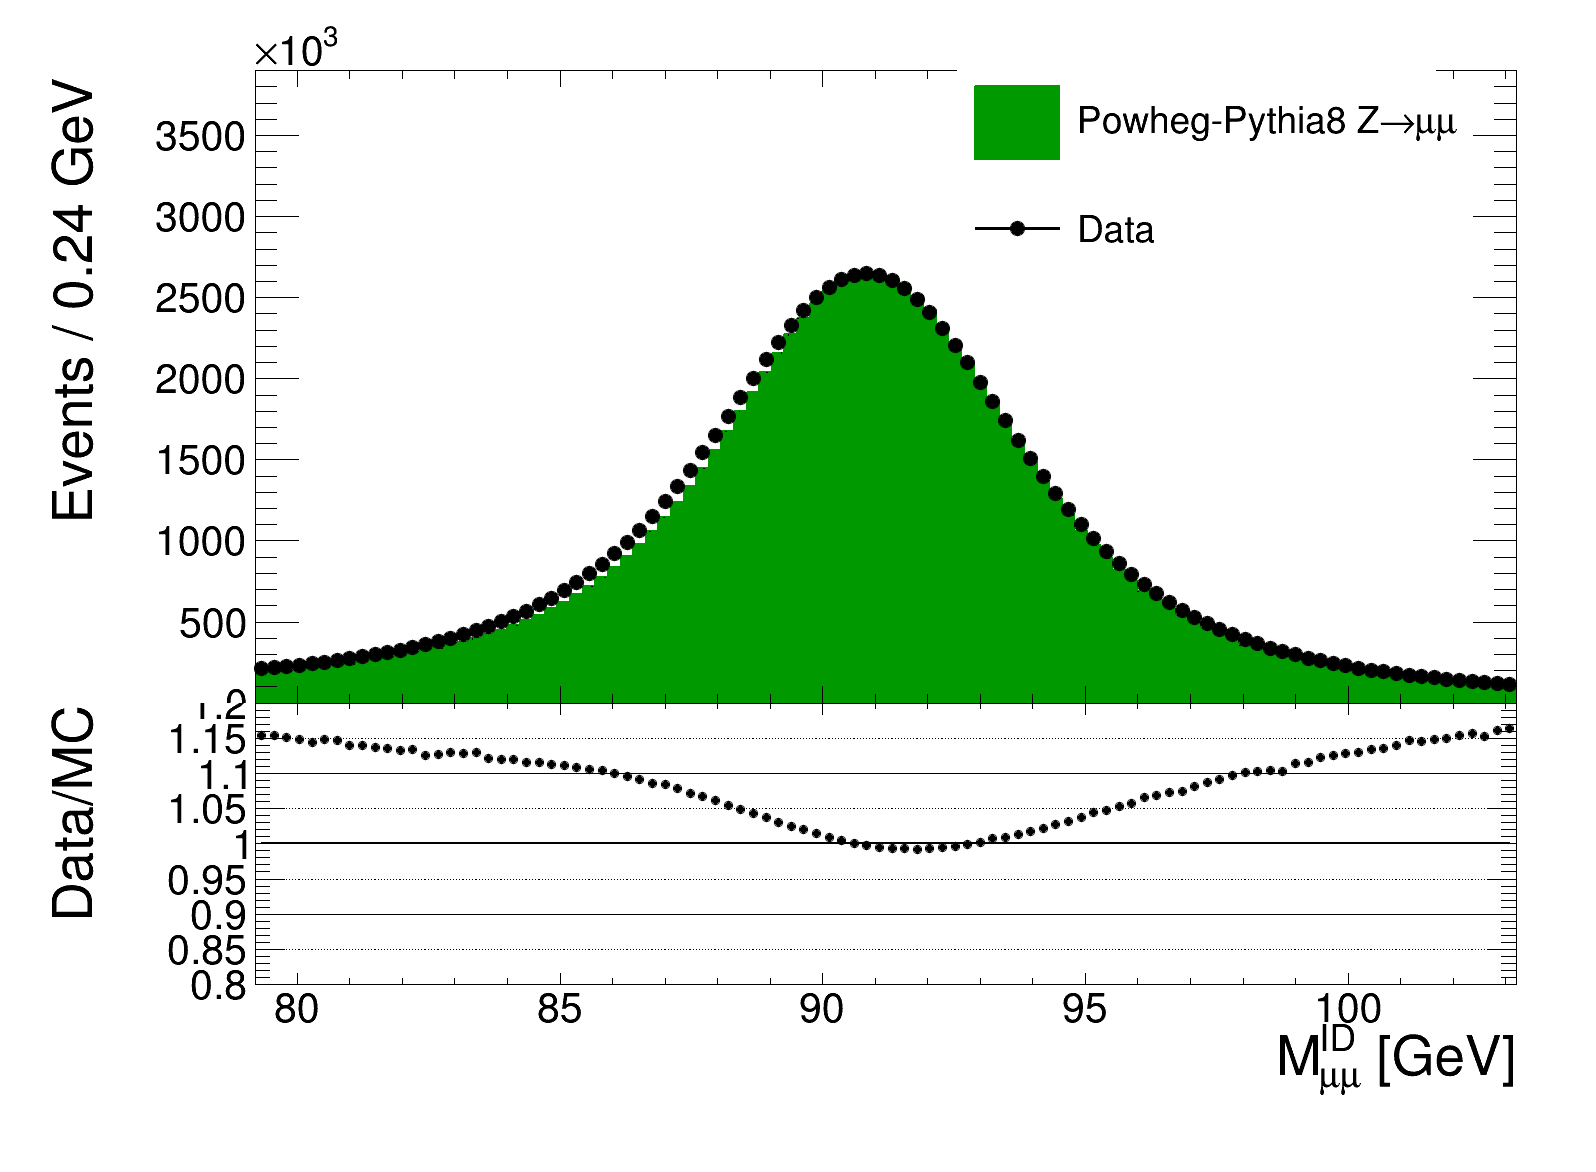

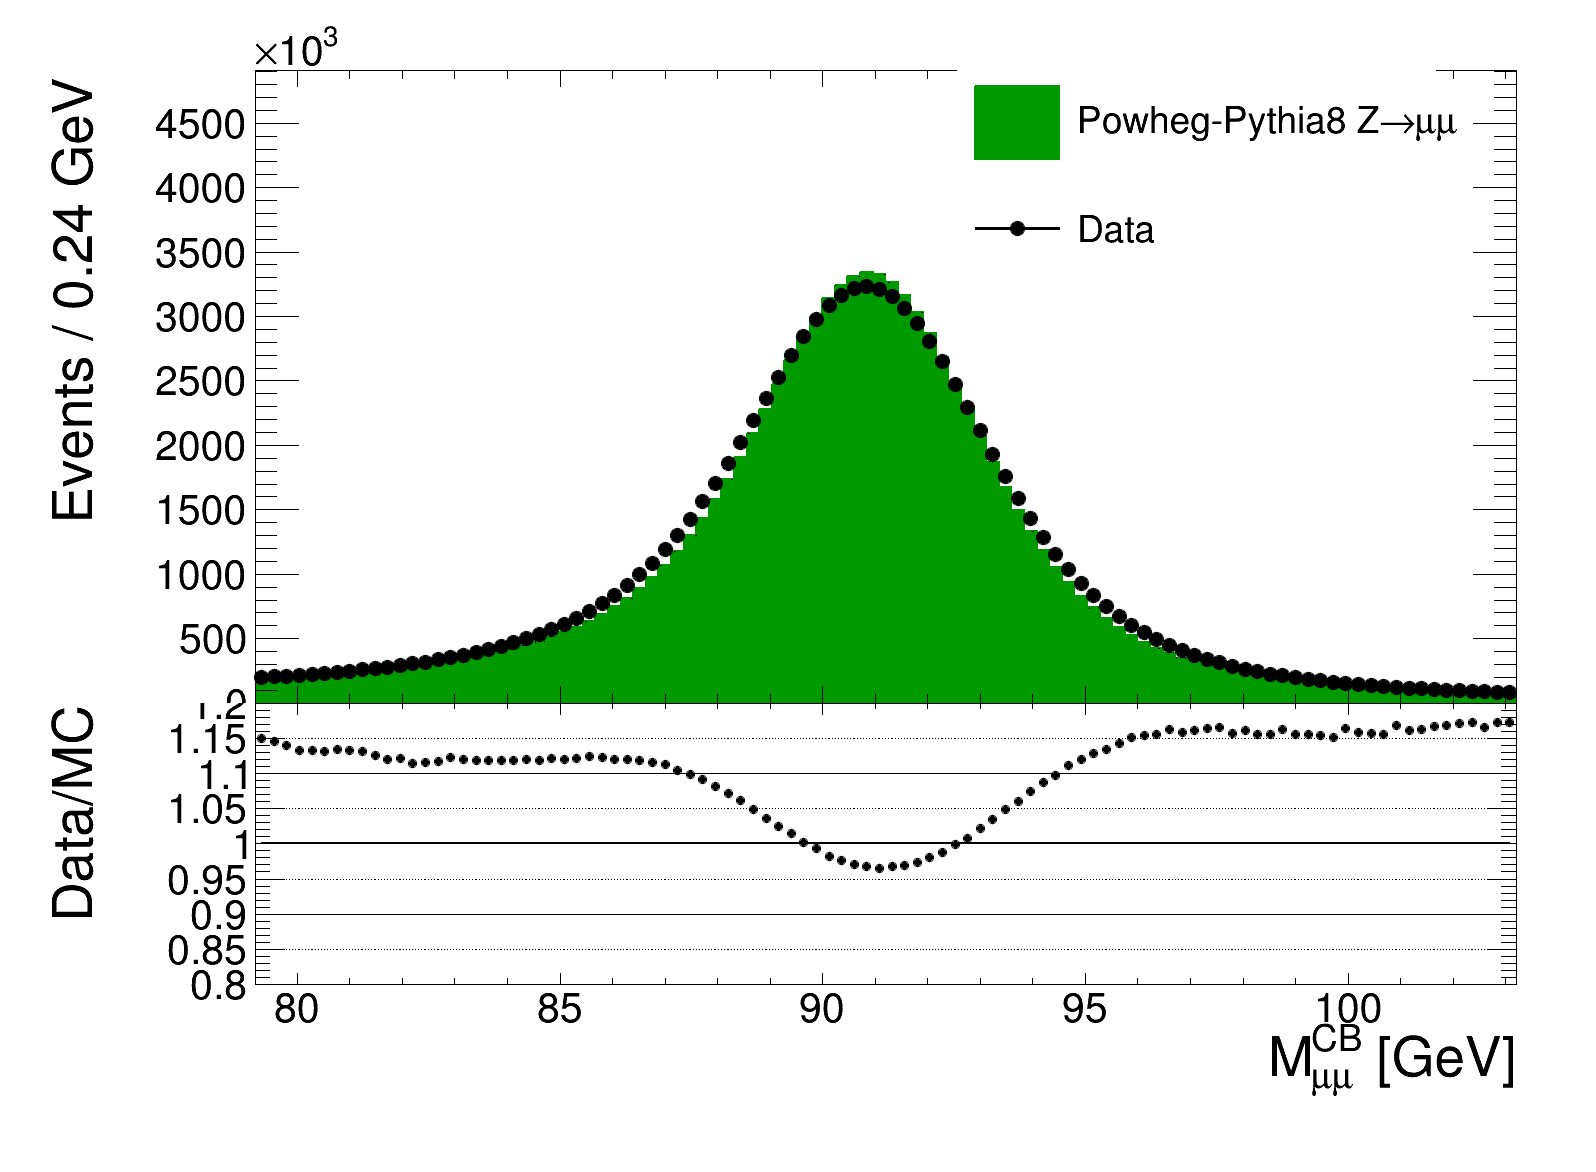

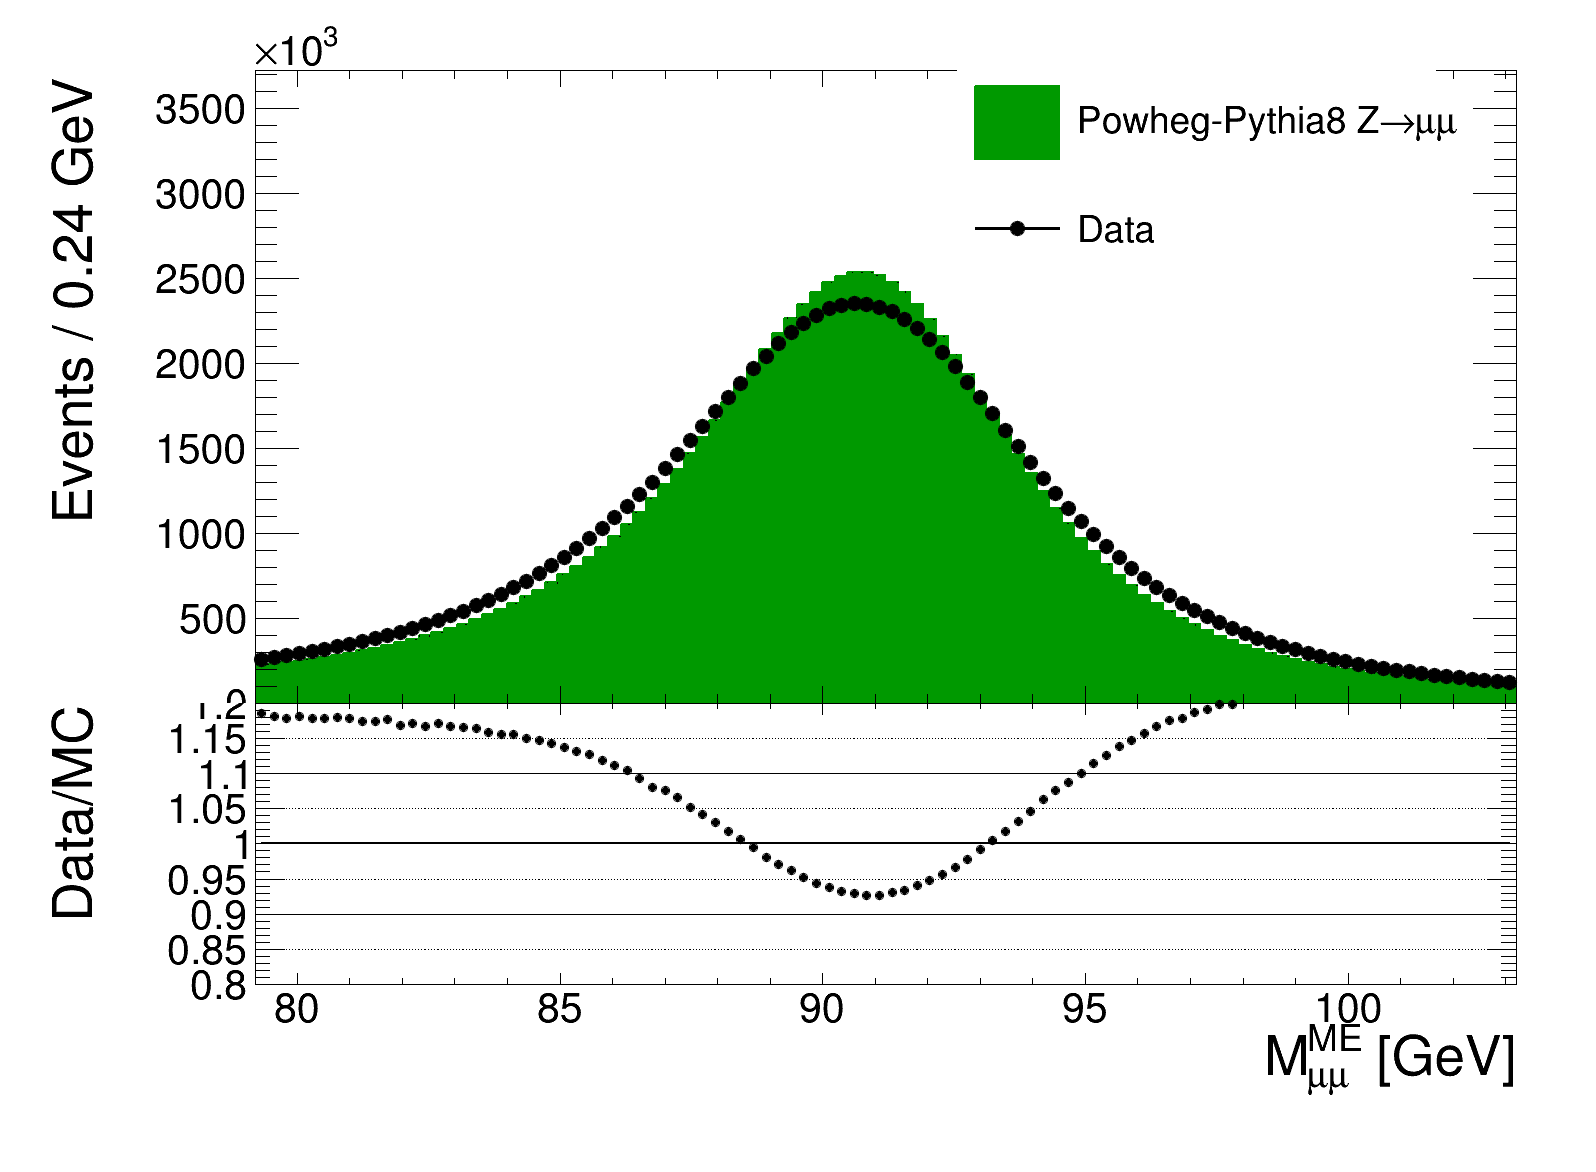

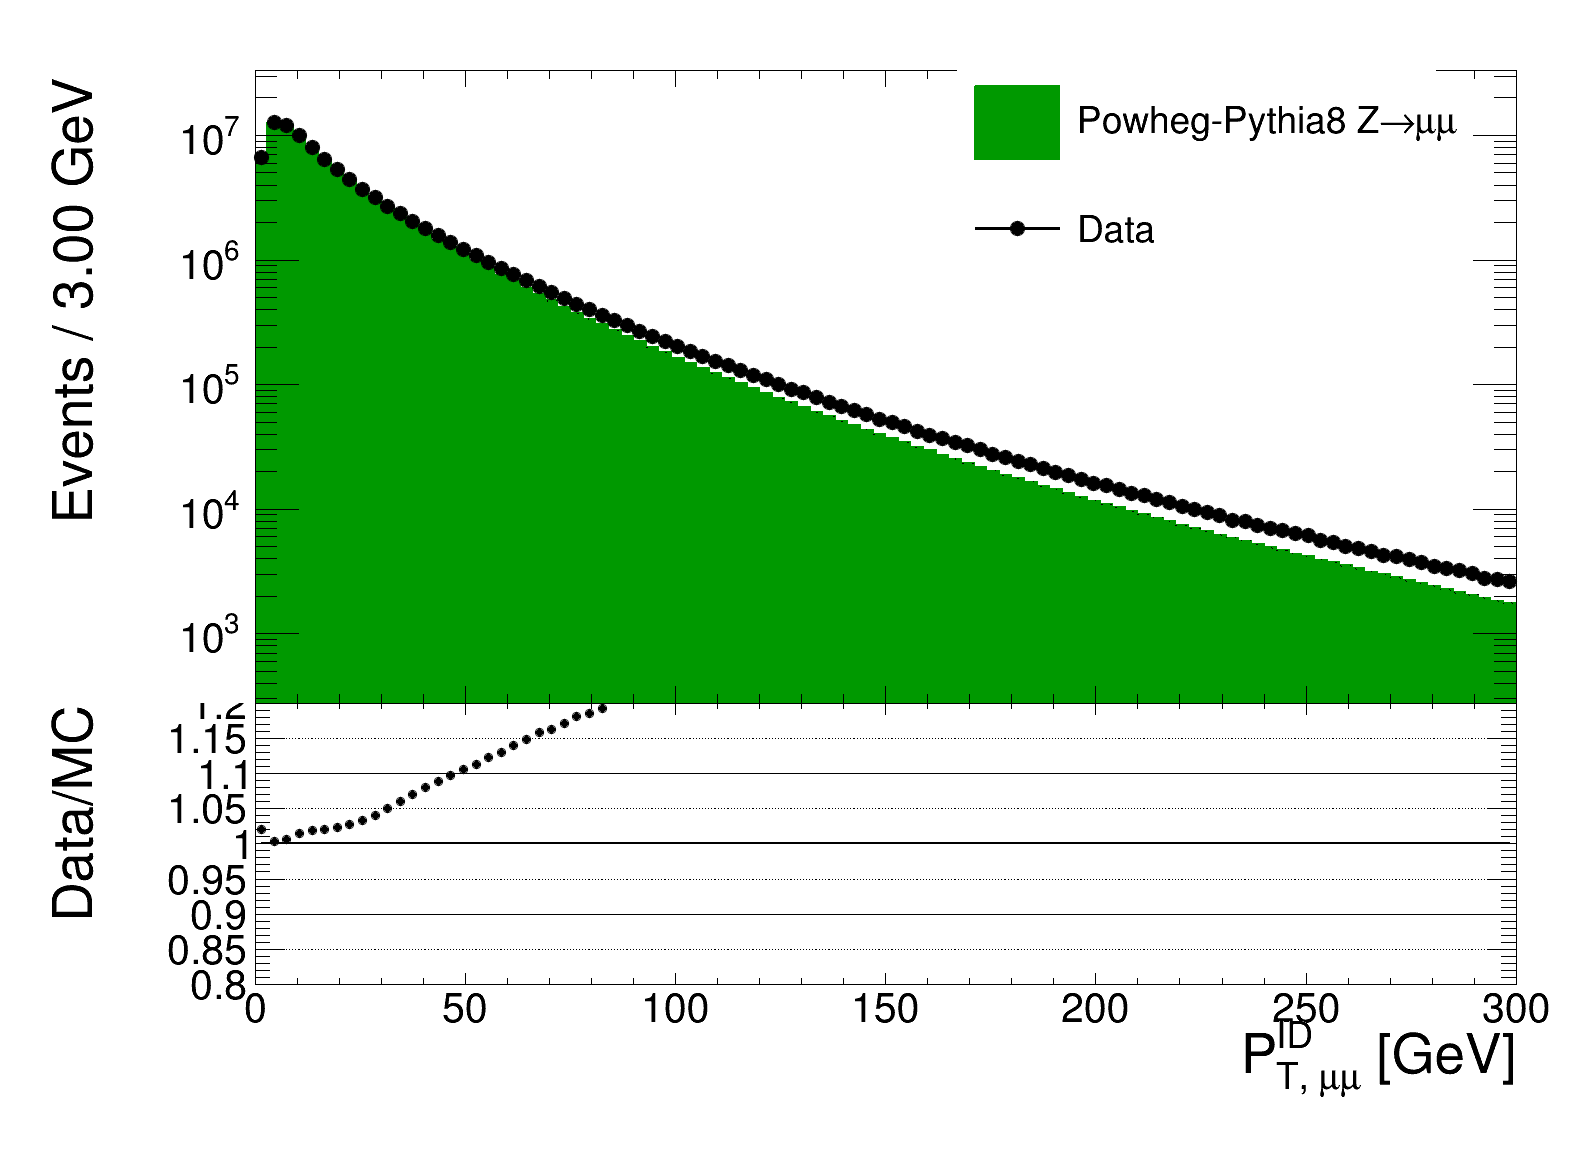

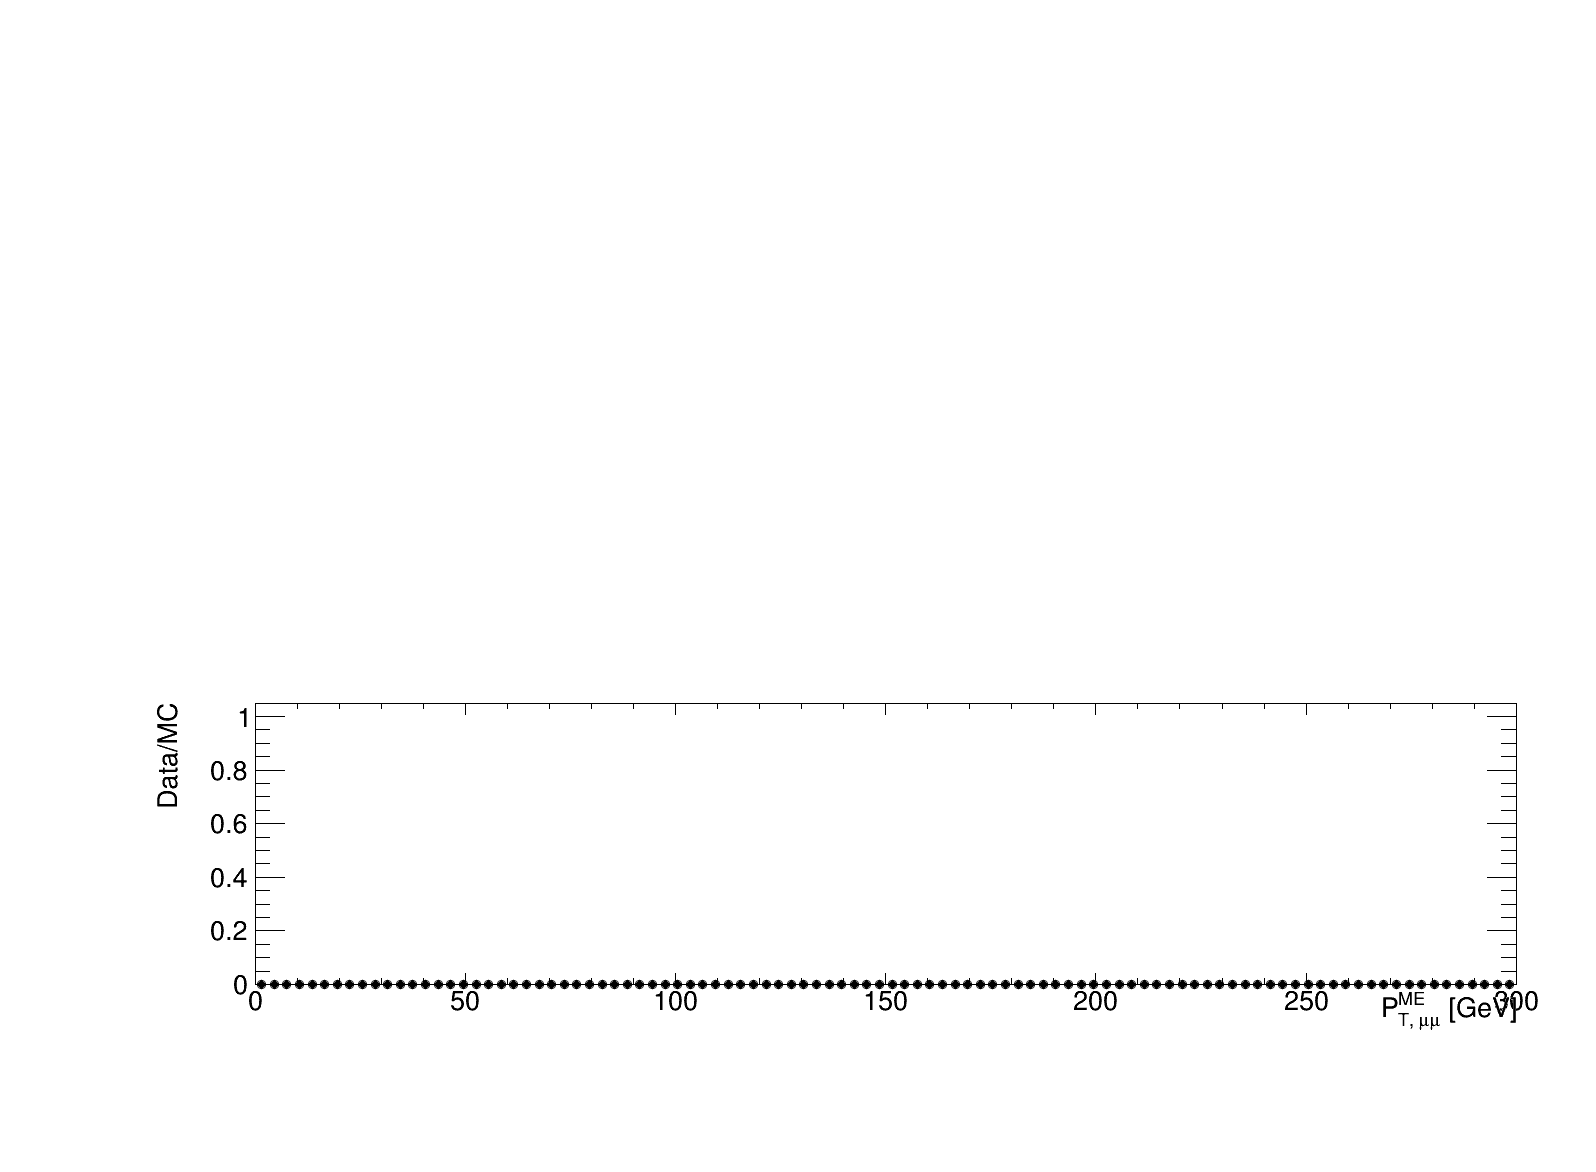

In [3]:
hname_base = "MassSpectrum_{}_Inclusive"
from plotting_utils import draw_data_vs_mc
import ROOT
for varname in ["ID","CB", "ME"]:
    hname = hname_base.format(varname)
    histograms = hm.get_histograms(hname, channels=["MCCalib", "Data"])
    ratio = draw_data_vs_mc(histograms,\
                    ratio_min = 0.8,\
                    ratio_max = 1.2,\
                    colours = {"MCCalib":ROOT.kGreen +2, "Data":ROOT.kBlack},\
                    legend_labels = {"Data":"Data", "MCCalib":"Powheg-Pythia8 Z#rightarrow#mu#mu"},\
                    legend_coordinates = (0.6, 0.6, 0.9, 0.9),\
                    x_axis_label = "M_{#mu#mu}^{"+varname+"}_{Corr} [GeV]",\
                    y_axis_label="Events",\
                    logy=False,\
                    extra_descr="",\
                    to_return = False,\
                    ftype = ".pdf",\
                    plot_dir = "plots",\
                    datakey = "Data")

hname_base = "MassSpectrum_{}_Inclusive"
from plotting_utils import draw_data_vs_mc
import ROOT
for varname in ["ID", "CB", "ME"]:
    hname = hname_base.format(varname)
    histograms = hm.get_histograms(hname, channels=["MC", "Data"])
    ratio = draw_data_vs_mc(histograms,\
                    ratio_min = 0.8,\
                    ratio_max = 1.2,\
                    colours = {"MC":ROOT.kGreen +2, "Data":ROOT.kBlack},\
                    legend_labels = {"Data":"Data", "MC":"Powheg-Pythia8 Z#rightarrow#mu#mu"},\
                    legend_coordinates = (0.6, 0.6, 0.9, 0.9),\
                    x_axis_label = "M_{#mu#mu}^{"+varname+"} [GeV]",\
                    y_axis_label="Events",\
                    logy=False,\
                    extra_descr="",\
                    to_return = False,\
                    ftype = ".pdf",\
                    plot_dir = "plots",\
                    datakey = "Data")
    
    
hname_base = "Pair_{}_Pt"
from plotting_utils import draw_data_vs_mc
import ROOT
for varname in ["ID", "ME"]:
    hname = hname_base.format(varname)
    histograms = hm.get_histograms(hname, channels=["MCCalib", "Data"])
    ratio = draw_data_vs_mc(histograms,\
                    ratio_min = 0.8,\
                    ratio_max = 1.2,\
                    colours = {"MCCalib":ROOT.kGreen +2, "Data":ROOT.kBlack},\
                    legend_labels = {"Data":"Data", "MCCalib":"Powheg-Pythia8 Z#rightarrow#mu#mu"},\
                    legend_coordinates = (0.6, 0.6, 0.9, 0.9),\
                    x_axis_label = "P_{T, #mu#mu}^{"+varname+"} [GeV]",\
                    y_axis_label="Events",\
                    logy=True,\
                    extra_descr="",\
                    to_return = False,\
                    ftype = ".pdf",\
                    plot_dir = "plots",\
                    datakey = "Data")

In [ ]:
hname_base = "MassSpectrum_{}_Inclusive"
from plotting_utils import draw_data_vs_mc
import ROOT
for varname in ["ID", "ME"]:
    hname = hname_base.format(varname)
    histograms = hm.get_histograms(hname, channels=["MCSherpa", "Data"])
    ratio = draw_data_vs_mc(histograms,\
                    ratio_min = 0.8,\
                    ratio_max = 1.2,\
                    colours = {"MCSherpa":ROOT.kGreen +2, "Data":ROOT.kBlack},\
                    legend_labels = {"Data":"Data", "MCSherpa":"Sherpa Z#rightarrow#mu#mu"},\
                    legend_coordinates = (0.6, 0.6, 0.9, 0.9),\
                    x_axis_label = "M_{#mu#mu}^{"+varname+"} [GeV]",\
                    y_axis_label="Events",\
                    logy=False,\
                    extra_descr="",\
                    to_return = False,\
                    ftype = ".pdf",\
                    plot_dir = "plots",\
                    datakey = "Data")

import pandas
results = {"track type": [], "Mean [GeV]": [], "Mean Err [GeV]": [], "RMS [GeV]": [], "RMS Err [GeV]": [], "Generator":[]}
canvases = []
for varname in ["ID", "ME"]:
    hname = hname_base.format(varname)
    histograms = hm.get_histograms(hname, channels=["MC", "MCSherpa"])
    for key in histograms:
        print("Mean, {} {} {}".format(varname, key, histograms[key].GetMean()))
        print("RMS, {} {} {}".format(varname, key, histograms[key].GetRMS()))
        results["track type"].append(varname)
        if key == "MCSherpa": results["Generator"].append("Sherpa")
        if key == "MC": results["Generator"].append("PP8")
        results["Mean [GeV]"].append(histograms[key].GetMean())
        results["Mean Err [GeV]"].append(histograms[key].GetMeanError())
        results["RMS [GeV]"].append(histograms[key].GetRMS())
        results["RMS Err [GeV]"].append(histograms[key].GetRMSError())

    c = ROOT.TCanvas("Histogram{}".format(varname), "Histogram{}".format(varname))
    histograms["MC"].Scale(histograms["MCSherpa"].Integral()/histograms["MC"].Integral())
    histograms["MC"].Divide(histograms["MCSherpa"])
    histograms["MC"].GetYaxis().SetTitle("PP8/Sherpa")
    histograms["MC"].Draw()
    c.Draw()
    canvases.append(c)

dataframe = pandas.DataFrame.from_dict(results)
print(dataframe.to_latex(formatters={"Mean [GeV]": lambda x: "{:.4f}".format(x), "RMS [GeV]": lambda x: "{:.4f}".format(x), "Mean Err [GeV]": lambda x: "{:.4f}".format(x), "RMS Err [GeV]": lambda x: "{:.4f}".format(x)}))

hname_base = "Pair_{}_Pt"
from plotting_utils import draw_data_vs_mc
import ROOT
for varname in ["ID", "ME"]:
    hname = hname_base.format(varname)
    histograms = hm.get_histograms(hname, channels=["MCSherpa", "Data"])
    ratio = draw_data_vs_mc(histograms,\
                    ratio_min = 0.8,\
                    ratio_max = 1.2,\
                    colours = {"MCSherpa":ROOT.kGreen +2, "Data":ROOT.kBlack},\
                    legend_labels = {"Data":"Data", "MCSherpa":"Sherpa Z#rightarrow#mu#mu"},\
                    legend_coordinates = (0.6, 0.6, 0.9, 0.9),\
                    x_axis_label = "P_{T, #mu#mu}^{"+varname+"} [GeV]",\
                    y_axis_label="Events",\
                    logy=True,\
                    extra_descr="",\
                    to_return = False,\
                    ftype = ".pdf",\
                    plot_dir = "plots",\
                    datakey = "Data")

In [ ]:
Neg_histograms = ["Neg_ID_AverageMassProfile_{}".format(i) for i in range(0, 12)]
Pos_histograms = ["Pos_ID_AverageMassProfile_{}".format(i) for i in range(0, 12)]

In [ ]:
hist_cache = {}
canvases = []
from IterativeBiasCorrection import calculate_sagitta_bias
import ROOT
from binnings import global_pt_binning, global_pt_binning_zipped

def draw_text(x, y, text, color=ROOT.kBlack, size=0.05):
    '''Draw text.
    Parameters
    ----------
    x : float
        x position in NDC coordinates
    y : float
        y position in NDC coordinates
    text : string, optional
        The text
    color : int, optional
        Text colour (the default is 1, i.e. black).
        See https://ROOT.cern.ch/doc/master/classTColor.html.
        If you know the hex code, rgb values, etc., use ``ROOT.TColor.GetColor()``
    size : float, optional
        Text size
        See https://ROOT.cern.ch/doc/master/classTLatex.html
    '''
    l = ROOT.TLatex()
    l.SetTextSize(size)
    l.SetNDC()
    l.SetTextColor(color)
    l.DrawLatex(x, y, text)
#@title_style = ROOT.gStyle.GetOptTitle()
#print(title_style)
#from style import set_style, get_atlas_style
#astyle = get_atlas_style()
#astyle.SetOptTitle(title_style)
#set_style(astyle)
from atlasplots import set_atlas_style, atlas_label
set_atlas_style()
print(dir(atlasplots))
for Pos_histogram, Neg_histogram, binlow, binhigh in zip(Pos_histograms,\
                                                         Neg_histograms,\
                                                         global_pt_binning[:-1],\
                                                         global_pt_binning[1:]):
    description = r"{:.1f} < {} < {:.1f}".format(binlow, "P_{T}^{ID}", binhigh)
    
    
    h_pos = hm.get_histograms(Pos_histogram)
    hist_cache[Pos_histogram] = h_pos
    h_neg = hm.get_histograms(Neg_histogram)
    hist_cache[Neg_histogram] = h_neg
    canvases.append(ROOT.TCanvas(Pos_histogram + Neg_histogram))
    h_pos["Data"].Draw("COLZ")
    h_pos["Data"].GetYaxis().SetTitleOffset(0.7*h_pos["Data"].GetYaxis().GetTitleOffset())
    canvases[-1].SetTopMargin(0.1)
    atlas_label(0.2, 0.94, "Internal   {}".format(description))
    canvases[-1].SetRightMargin(0.25)
    canvases[-1].Draw()
    
    ROOT.gStyle.SetPalette(ROOT.kTemperatureMap)

    bias_hist = calculate_sagitta_bias(h_pos["Data"], h_neg["Data"])
    canvases.append(ROOT.TCanvas(Pos_histogram + Neg_histogram + "Sagitta"))
    bias_hist.Draw("COLZ")
    bias_hist.SetMinimum(-0.15)
    bias_hist.SetMaximum(0.15)
    bias_hist.SetTitle(description)
    bias_hist.GetYaxis().SetTitleOffset(0.7*bias_hist.GetYaxis().GetTitleOffset())
    bias_hist.GetXaxis().SetTitleOffset(0.8*bias_hist.GetXaxis().GetTitleOffset())
    bias_hist.GetZaxis().SetTitleOffset(1.25*bias_hist.GetZaxis().GetTitleOffset())
    hist_cache["bias_hist{}".format(bias_hist.GetName())] = bias_hist

    canvases[-1].SetTopMargin(0.1)
    canvases[-1].cd()

    atlas_label(0.2, 0.94, "Internal   {}".format(description))
    canvases[-1].SetRightMargin(0.25)
    canvases[-1].Draw()

In [ ]:
histograms = ["Pos_CB_Mass_Histogram_{}".format(i) for i in range(0, 12)]
from plotting_utils import draw_data_vs_mc
for hname in histograms:
    histograms = hm.get_histograms(hname)
    draw_data_vs_mc(histograms,\
                    ratio_min = 0.9,\
                    ratio_max = 1.1,\
                    colours = {"MC":ROOT.kGreen +2, "Data":ROOT.kBlack},\
                    legend_labels = {"Data":"Data", "MC":"Powheg-Pythia8 Z#rightarrow#mu#mu"},\
                    legend_coordinates = (0.6, 0.6, 0.9, 0.9),\
                    x_axis_label = "M_{#mu#mu} [GeV]",\
                    y_axis_label="Events",\
                    logy=False,\
                    extra_descr="",\
                    to_return = False,\
                    ftype = ".pdf",\
                    plot_dir = "plots",\
                    datakey = "Data")